# Hoja de Trabajo 4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv("../dataset/train.csv")


6. Dependiendo del análisis exploratorio elaborado cree una variable respuesta que le
permita clasificar las casas en Económicas, Intermedias o Caras. Los límites de estas clases
deben tener un fundamento en la distribución de los datos de precios, y estar bien
explicados

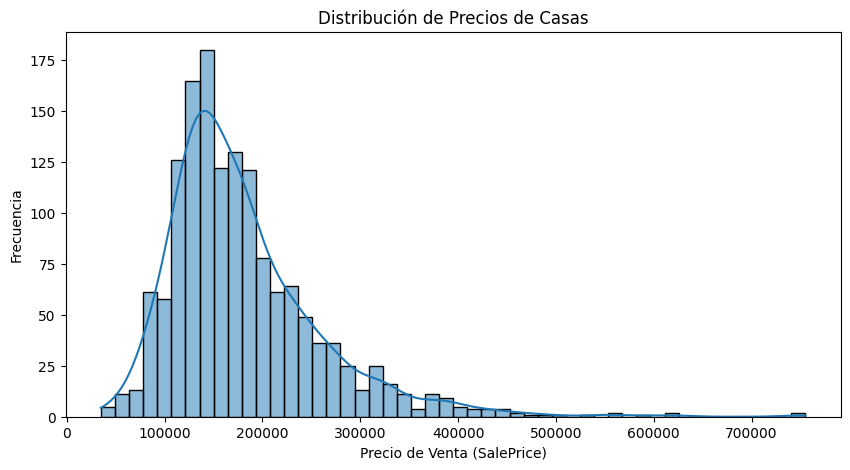

Límite Económicas: < $139,000
Límite Intermedias: $139,000 - $191,000
Límite Caras: > $191,000


C:\Users\usuario\AppData\Local\Temp\ipykernel_18820\2846510279.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['PriceCategory'], palette="viridis")


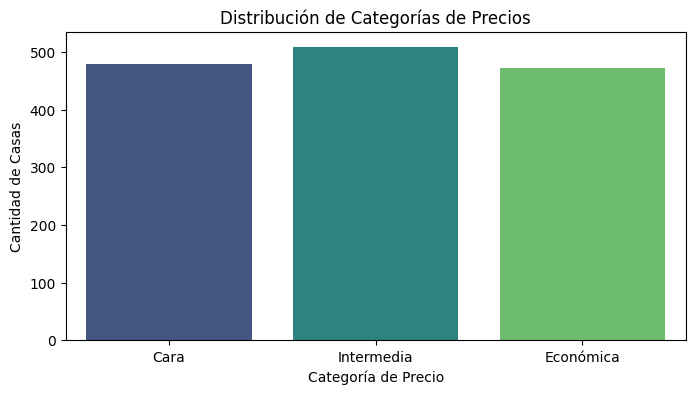

,SalePrice,PriceCategory
781,175900,Intermedia
948,192500,Cara
447,199900,Cara
1259,151000,Intermedia
1000,82000,Económica
671,103600,Económica
788,107900,Económica
1078,155900,Intermedia
164,152000,Intermedia
69,225000,Cara


In [6]:

# Exploración inicial de SalePrice
plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice'], bins=50, kde=True)
plt.xlabel("Precio de Venta (SalePrice)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Precios de Casas")
plt.show()

# Determinar los percentiles 33 y 67 para definir los rangos de precios
low_threshold = np.percentile(df['SalePrice'], 33)
high_threshold = np.percentile(df['SalePrice'], 67)

print(f"Límite Económicas: < ${low_threshold:,.0f}")
print(f"Límite Intermedias: ${low_threshold:,.0f} - ${high_threshold:,.0f}")
print(f"Límite Caras: > ${high_threshold:,.0f}")

# Creación de la variable categórica 'PriceCategory'
def categorize_price(price):
    if price < low_threshold:
        return "Económica"
    elif price <= high_threshold:
        return "Intermedia"
    else:
        return "Cara"

# Aplicar la función al DataFrame
df['PriceCategory'] = df['SalePrice'].apply(categorize_price)

# Visualización de la distribución de la nueva variable
plt.figure(figsize=(8,4))
sns.countplot(x=df['PriceCategory'], palette="viridis")
plt.xlabel("Categoría de Precio")
plt.ylabel("Cantidad de Casas")
plt.title("Distribución de Categorías de Precios")
plt.show()

# Mostrar algunas filas con la nueva clasificación
df[['SalePrice', 'PriceCategory']].sample(10)


### Interpretación:

La clasificación de precios de casas en Económicas, Intermedias y Caras se realizó dividiendo la distribución de SalePrice en tres grupos utilizando los percentiles 33 y 67 como puntos de corte. Esto permite que cada categoría tenga un número balanceado de casas, reflejando las tendencias generales del mercado inmobiliario.

1. Casas Económicas (SalePrice < $139,000): Representan las viviendas más accesibles, con menor tamaño, ubicación menos privilegiada o materiales de construcción más básicos. Estas casas suelen atraer compradores con presupuestos más ajustados o inversionistas buscando remodelaciones.

2. Casas Intermedias ($139,000 ≤ SalePrice ≤ $191,000): Son propiedades de precio moderado, con características y ubicaciones estándar. Representan la mayor parte del mercado, incluyendo casas con acabados medios y comodidades suficientes para familias promedio.

3. Casas Caras (SalePrice > $191,000): Incluyen viviendas con características premium, mayor espacio habitable, mejores acabados y ubicaciones más atractivas. Estas propiedades suelen estar en barrios de mayor prestigio y pueden incluir características adicionales como grandes jardines o garajes amplios.


7. Elabore un árbol de clasificación utilizando la variable respuesta que creó en el punto
anterior. Explique los resultados a los que llega. Muestre el modelo gráficamente. Recuerde
que la nueva variable respuesta es categórica, pero se generó a partir de los precios de las
casas, no incluya el precio de venta para entrenar el modelo




8. Utilice el modelo con el conjunto de prueba y determine la eficiencia del algoritmo para
clasificar

Reporte de Clasificación:
              precision    recall  f1-score   support

        Cara       0.90      0.84      0.87        94
   Económica       0.81      0.67      0.73       109
  Intermedia       0.56      0.72      0.63        89

    accuracy                           0.74       292
   macro avg       0.76      0.74      0.74       292
weighted avg       0.76      0.74      0.75       292



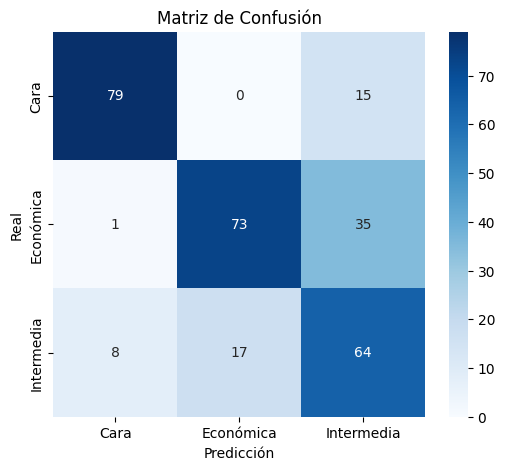

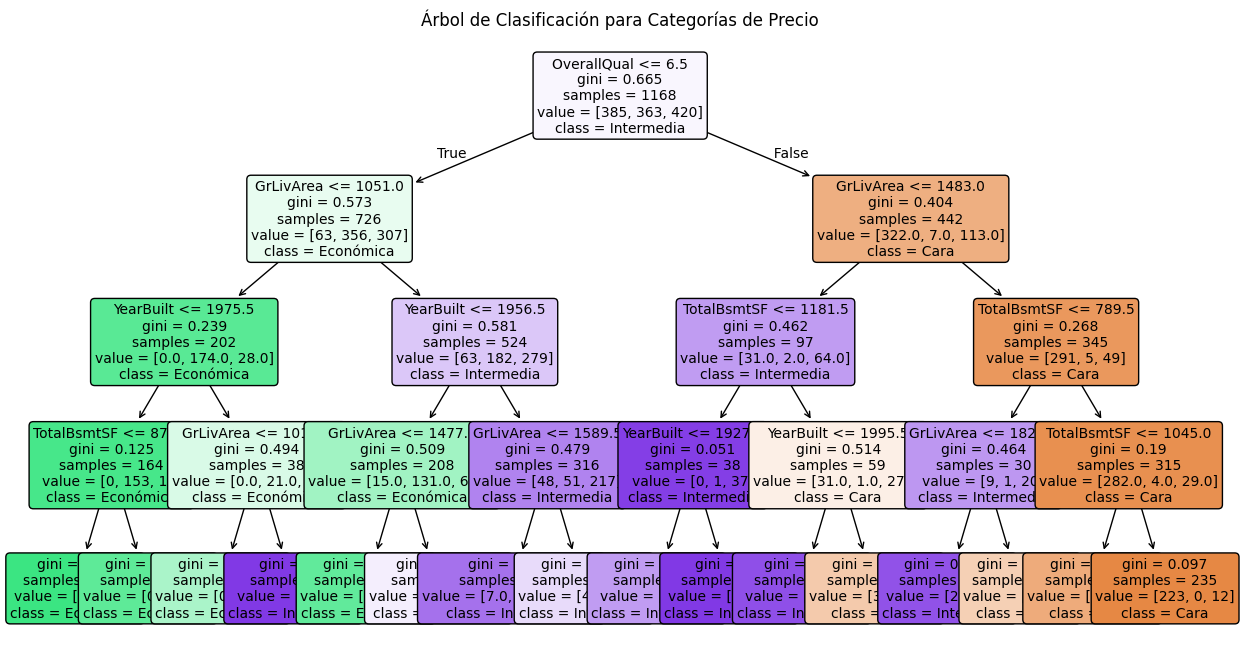

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Variables predictoras (excluyendo 'SalePrice')
predictors = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']

# Variable objetivo (PriceCategory creada en el ejercicio anterior)
X = df[predictors]
y = df['PriceCategory']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Árbol de Clasificación
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluación del modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Visualización del Árbol de Decisión
plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=predictors, class_names=clf.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Árbol de Clasificación para Categorías de Precio")
plt.show()


### Interpretación:


El **Árbol de Decisión** clasifica casas dividiendo los datos en función de las variables más relevantes (`OverallQual`, `GrLivArea`, etc.). Usa el **índice Gini** para elegir la mejor división, creando ramas hasta alcanzar una condición de parada. Para clasificar una casa, sigue las reglas del árbol desde la raíz hasta una hoja. Aunque el modelo es efectivo, puede **sobreajustarse**, por lo que mejoras como **Random Forest o Gradient Boosting** pueden aumentar la precisión.

Este obtuvo una precisión del **74%**, siendo más preciso al identificar **casas caras (90%)** y menos efectivo con **casas intermedias (56%)**, que a menudo se confunden con económicas o caras.

La **matriz de confusión** muestra que el modelo **tiende a clasificar erróneamente casas intermedias**, lo que indica que los límites entre estas categorías no son completamente claros.

El **árbol de decisión** revela que las variables más importantes para la clasificación son **`OverallQual` y `GrLivArea`**, seguidas por **`YearBuilt` y `TotalBsmtSF`**.


9. Haga un análisis de la eficiencia del algoritmo usando una matriz de confusión para el árbol
de clasificación. Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde
se equivocó menos y la importancia que tienen los errores.

La matriz de confusión nos permite evaluar la precisión del modelo identificando aciertos y errores en la clasificación de las casas en Económicas, Intermedias y Caras.

1. Efectividad Global del Modelo
Precisión general: 74%, lo que indica que el modelo clasifica correctamente 3 de cada 4 casas.
Funciona mejor para casas caras (90% de precisión), pero tiene dificultades con casas intermedias (56%).

2. Dónde el Algoritmo se Equivocó Más
Casas intermedias fueron confundidas con económicas y caras (17 y 8 errores, respectivamente).
Casas económicas fueron clasificadas como intermedias en 35 casos, lo que indica que el límite entre ambas categorías no es tan claro.

3. Dónde el Algoritmo se Equivocó Menos
Casas caras se identificaron con más precisión, con solo 15 errores al clasificarlas como intermedias.
Casas económicas rara vez fueron confundidas con casas caras, lo que sugiere que las diferencias entre estos extremos son más evidentes.

4. Importancia de los Errores
Confundir una casa intermedia con una económica o cara puede afectar la precisión del modelo y su utilidad para la toma de decisiones. Si el modelo se usa para estrategias de precios en bienes raíces, estos errores pueden impactar la valoración de propiedades y la toma de decisiones de compra o venta.

Conclusión: el modelo tiene un buen desempeño general, pero puede mejorar en la clasificación de casas intermedias. Ajustar la profundidad del árbol o probar Random Forest podría reducir estos errores y aumentar la precisión en categorías difíciles de diferenciar.

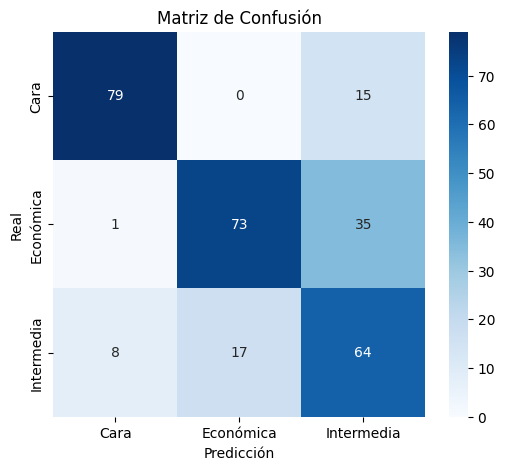

Extra: Posibles mejoras al modelo


Reporte de Clasificación (Árbol de Decisión):
              precision    recall  f1-score   support

        Cara       0.92      0.77      0.84        94
   Económica       0.79      0.78      0.79       109
  Intermedia       0.57      0.69      0.62        89

    accuracy                           0.75       292
   macro avg       0.76      0.74      0.75       292
weighted avg       0.77      0.75      0.75       292



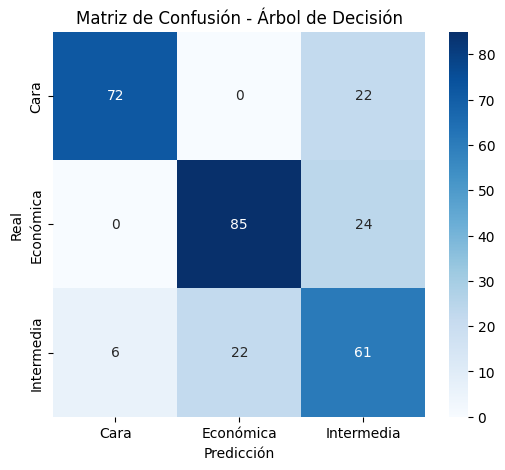

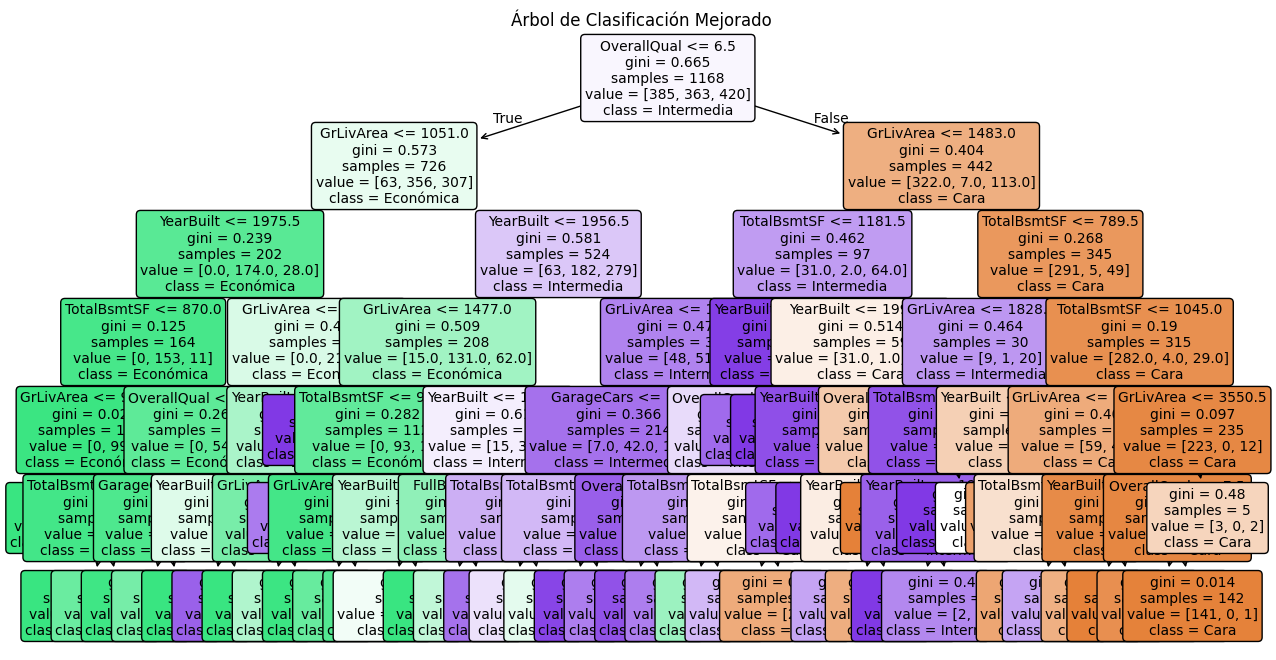

Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

        Cara       0.91      0.82      0.86        94
   Económica       0.91      0.82      0.86       109
  Intermedia       0.67      0.82      0.74        89

    accuracy                           0.82       292
   macro avg       0.83      0.82      0.82       292
weighted avg       0.83      0.82      0.82       292



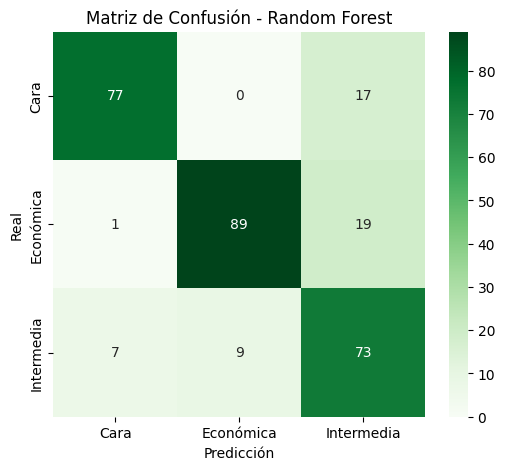

Precisión promedio con validación cruzada (Random Forest): 0.79


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Variables predictoras (agregando más características relevantes)
predictors = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']
X = df[predictors]
y = df['PriceCategory']  # Variable creada previamente

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajuste del Árbol de Decisión con hiperparámetros mejorados
clf = DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

# Predicciones con Árbol de Decisión
y_pred_tree = clf.predict(X_test)

# Evaluación del Árbol de Decisión
print("Reporte de Clasificación (Árbol de Decisión):")
print(classification_report(y_test, y_pred_tree))

# Matriz de confusión para el Árbol de Decisión
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

# Visualización del Árbol de Decisión
plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=predictors, class_names=clf.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Árbol de Clasificación Mejorado")
plt.show()

# Implementación de Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf.fit(X_train, y_train)

# Predicciones con Random Forest
y_pred_rf = rf.predict(X_test)

# Evaluación de Random Forest
print("Reporte de Clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión para Random Forest
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Validación cruzada para evaluar el rendimiento del Random Forest
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"Precisión promedio con validación cruzada (Random Forest): {scores.mean():.2f}")


Interpretación:

El ajuste de hiperparámetros generó una pequeña mejora en la precisión global y la clasificación de casas económicas, pero las casas intermedias siguen siendo un desafío.

En cambio, random forest demostró:
- Mayor estabilidad: Al combinar múltiples árboles, se reduce el sobreajuste de un solo árbol.
- Mejor clasificación de casos difíciles: Mejora la clasificación de casas intermedias, que eran las más confusas.
- Mayor precisión general: Todas las clases obtienen mejores resultados, lo que hace que el modelo sea más confiable.
